In [22]:
import pandas as pd

datos={'nombre':['Juan','Maria','Pedro','Luisa','Mateo','Viviana','Matias','Gerardo','Fredy','Vaneza'],
        'Educación':[1200,0,7500,2200,8300,0,0,4900,5100,800],
        'edad':[35,50,22,45,18,75,55,20,23,49],
        'Salud':[200,1500,150,250,0,2500,1400,50,0,600],
        'Golosinas':[10,15,0,10,20,10,20,10,15,0]}

df_datos=pd.DataFrame(datos)
df_datos.set_index('nombre', inplace=True)
df_datos

,Educación,edad,Salud,Golosinas
nombre,,,,
Juan,1200,35,200,10
Maria,0,50,1500,15
Pedro,7500,22,150,0
Luisa,2200,45,250,10
Mateo,8300,18,0,20
Viviana,0,75,2500,10
Matias,0,55,1400,20
Gerardo,4900,20,50,10
Fredy,5100,23,0,15


In [23]:
from sklearn.preprocessing import StandardScaler

escala =StandardScaler(with_mean=True, with_std=True)

datos_standart=escala.fit_transform(df_datos)

datos_standart


array([[-0.59318458, -0.23583599, -0.57564452, -0.15075567],
       [-0.98864096,  0.60643541,  1.03368425,  0.60302269],
       [ 1.48296144, -0.96580454, -0.63754178, -1.6583124 ],
       [-0.26363759,  0.32567827, -0.51374726, -0.15075567],
       [ 1.74659903, -1.19041025, -0.82323356,  1.35680105],
       [-0.98864096,  2.01022108,  2.27162945, -0.15075567],
       [-0.98864096,  0.88719254,  0.90988973,  1.35680105],
       [ 0.62613927, -1.07810739, -0.7613363 , -0.15075567],
       [ 0.69204867, -0.90965311, -0.82323356,  0.60302269],
       [-0.72500337,  0.55028398, -0.08046644, -1.6583124 ]])

In [9]:
import numpy as np

np.mean(datos_standart[:,0])
np.std(datos_standart[:,0])

-1.6653345369377348e-16

In [24]:
df_datos.var()

Educación    1.023111e+07
edad         3.524000e+02
Salud        7.250278e+05
Golosinas    4.888889e+01
dtype: float64

In [25]:
df_datos.cov()

,Educación,edad,Salud,Golosinas
Educación,1.023111e+07,-51788.888889,-1.923333e+06,-500.000000
edad,-5.178889e+04,352.400000,1.453000e+04,-0.777778
Salud,-1.923333e+06,14530.000000,7.250278e+05,816.666667
Golosinas,-5.000000e+02,-0.777778,8.166667e+02,48.888889


In [33]:
from sklearn.decomposition import PCA

pca=PCA(n_components=3)
datos_pca=pca.fit_transform(datos_standart)
datos_pca

array([[-0.14833212, -0.2174737 , -0.82623564],
       [ 1.53651798,  0.54767642, -0.08732062],
       [-1.85709208, -1.4921768 ,  0.7784069 ],
       [ 0.04149318, -0.23817484, -0.47642267],
       [-2.08650216,  1.51875012,  0.54141916],
       [ 3.04805149, -0.22896678,  0.92372279],
       [ 1.67438015,  1.25918365, -0.20941121],
       [-1.43943564, -0.06392102, -0.10980295],
       [-1.37048354,  0.66744436, -0.15468149],
       [ 0.60140275, -1.75234139, -0.37967426]])

In [34]:
var_explicada=pca.explained_variance_ratio_
var_explicada

array([0.66482365, 0.25238506, 0.07233933])

In [35]:
porcentaje_varianza=np.sum(var_explicada)
porcentaje_varianza

0.9895480443172123

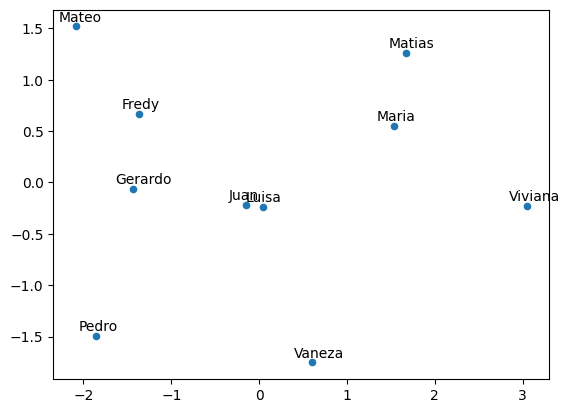

In [32]:
import matplotlib.pyplot as plt

nombres=df_datos.index
plt.scatter(x=datos_pca[:,0], y=datos_pca[:,1], s=20)

for i,nombre in enumerate(nombres):
    plt.annotate(nombre, (datos_pca[i,0]-0.2,datos_pca[i,1]+0.05))

plt.show()

c:\Users\SENA\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


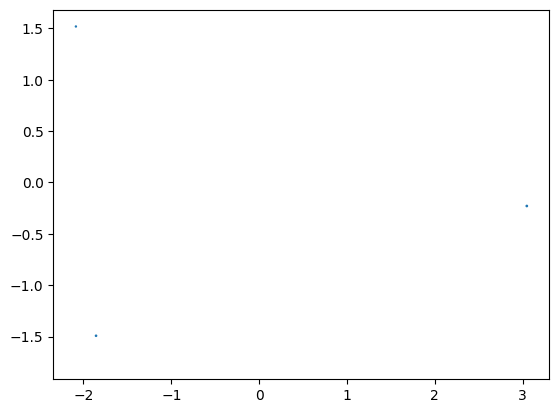

In [40]:
import matplotlib.pyplot as plt

nombres=df_datos.index
x=datos_pca[:,0]
y=datos_pca[:,1]
z=datos_pca[:,2]
plt.scatter(x,y,z)

""" for i,nombre in enumerate(nombres):
    plt.annotate(nombre, (datos_pca[i,0]-0.2,datos_pca[i,1]+0.05)) """

plt.show()

In [38]:
x=datos_pca[:,0]
x

array([-0.14833212,  1.53651798, -1.85709208,  0.04149318, -2.08650216,
        3.04805149,  1.67438015, -1.43943564, -1.37048354,  0.60140275])